<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/AMLASSIGN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Danni Jin AML Spring 2020 assignment #1**
Set up
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

**Get the data**

In [4]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/dnjhaha/AML/master/wine.csv'
wine = pd.read_csv(url)
wine.head(10)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [7]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# ** question1:Plot the classification data against each of the attributes**

Saving figure attribute_histogram_plots


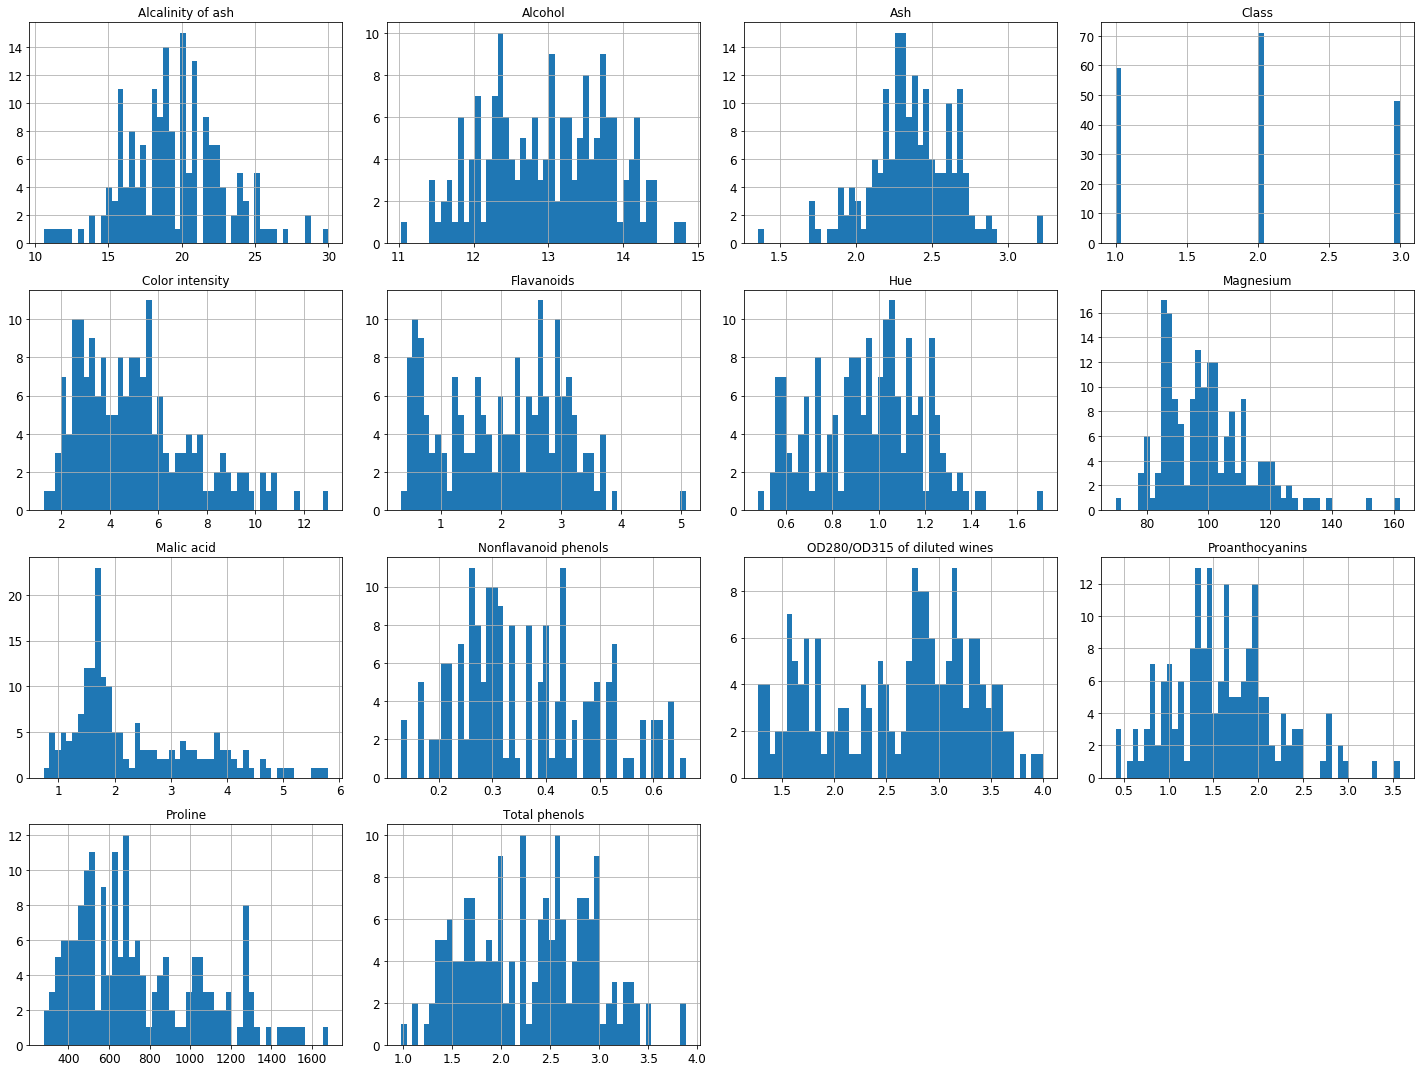

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


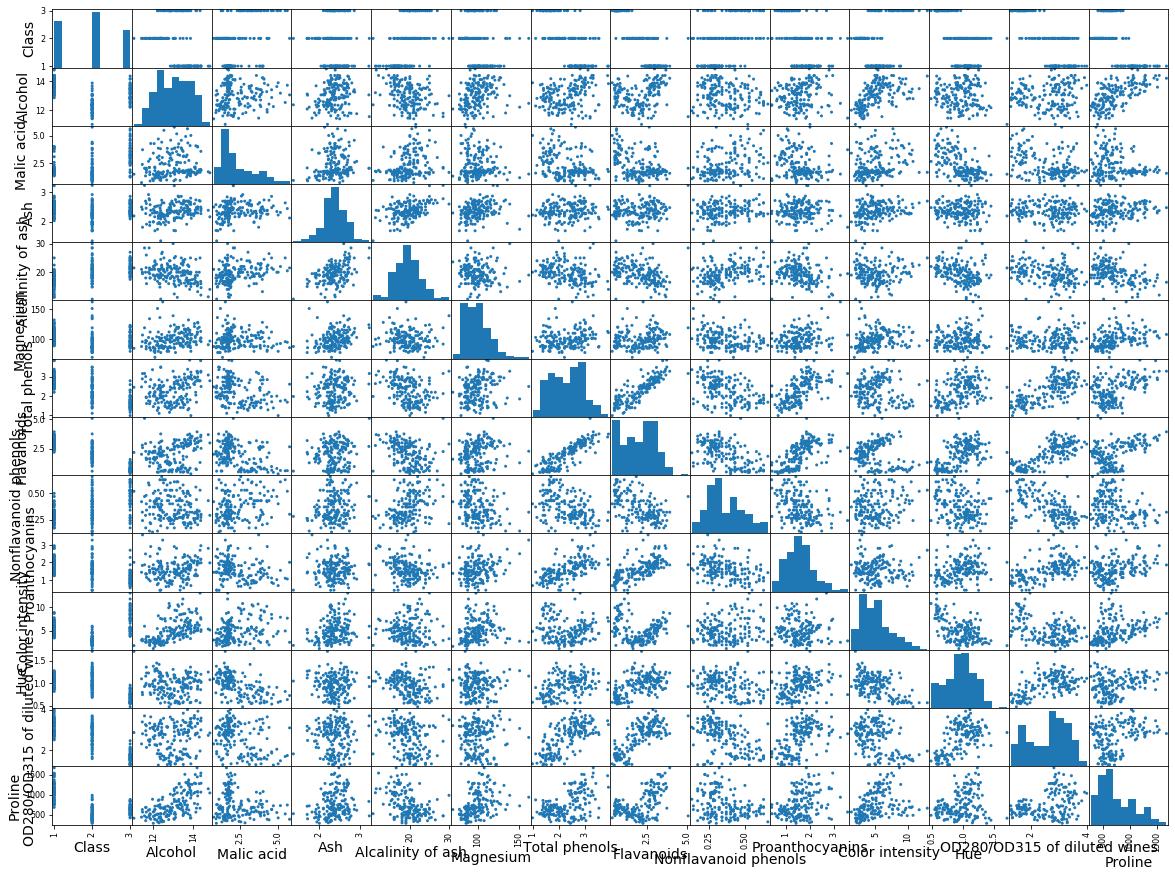

In [10]:

# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(20,15))
scatter_matrix(wine,alpha=1, ax=ax)
plt.show()

In [11]:
wine['Class'].value_counts(dropna=False)

2    71
1    59
3    48
Name: Class, dtype: int64

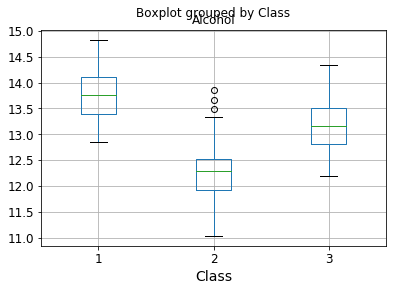

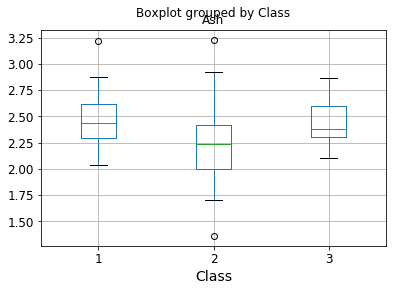

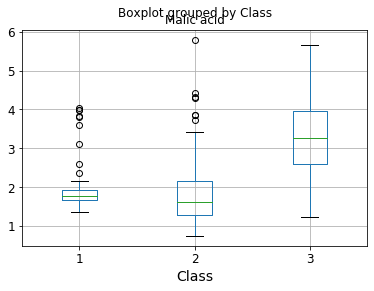

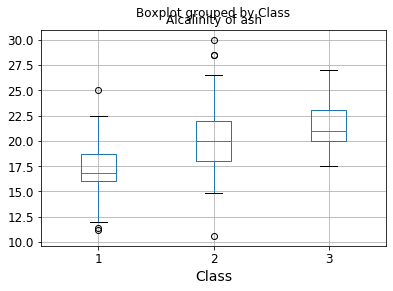

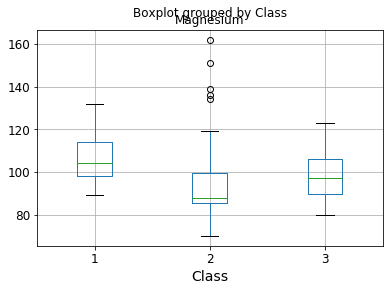

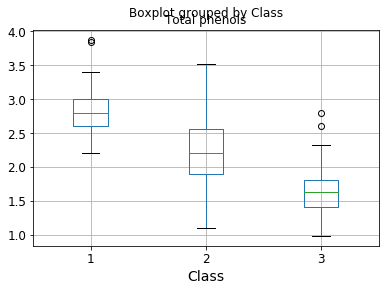

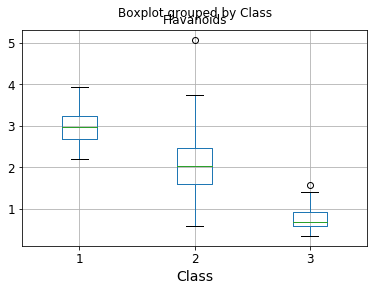

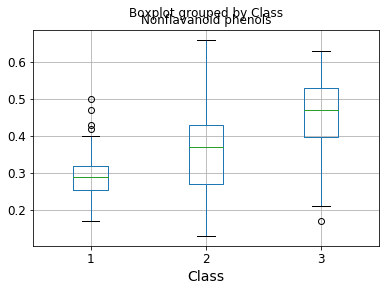

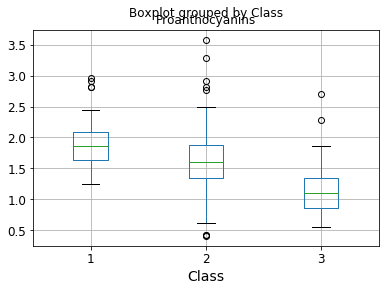

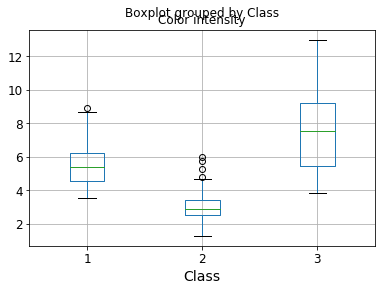

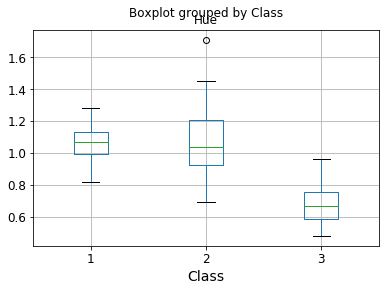

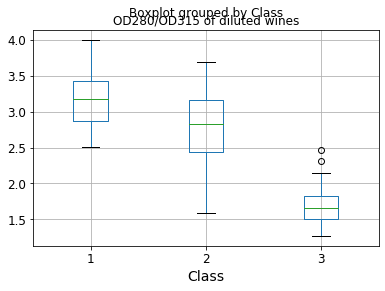

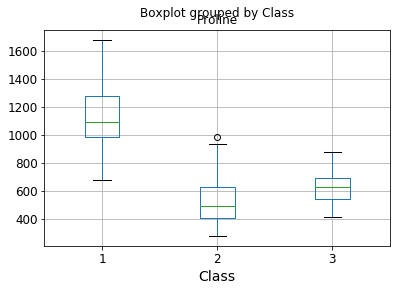

In [12]:
wine.boxplot(column='Alcohol',by='Class');
wine.boxplot(column='Ash',by='Class');
wine.boxplot(column='Malic acid',by='Class');
wine.boxplot(column='Alcalinity of ash',by='Class');
wine.boxplot(column='Magnesium',by='Class');
wine.boxplot(column='Total phenols',by='Class');
wine.boxplot(column='Flavanoids',by='Class');
wine.boxplot(column='Nonflavanoid phenols',by='Class');
wine.boxplot(column='Proanthocyanins',by='Class');
wine.boxplot(column='Color intensity',by='Class');
wine.boxplot(column='Hue',by='Class');
wine.boxplot(column='OD280/OD315 of diluted wines',by='Class'); 
wine.boxplot(column='Proline',by='Class');

In [0]:
np.random.seed(42)


In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:

train_set, test_set = split_train_test(wine, 0.2)
print(len(train_set), "train +", len(test_set), "test")

143 train + 35 test


In [0]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [0]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [0]:
wine_with_id = wine.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(wine_with_id, 0.2, "index")

In [20]:
test_set.head()


,index,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
4,4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
11,11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
20,20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
23,23,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine, test_size=0.2, random_state=42)

In [22]:
test_set.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


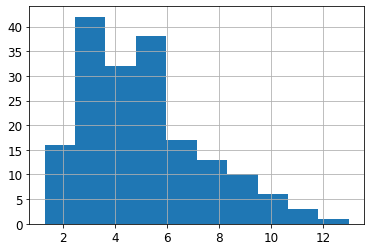

In [23]:
wine["Color intensity"].hist()

In [0]:
wine["color_cat"]= np.ceil(wine["Color intensity"] / 1.8)
# Label those above 5 as 5
wine["color_cat"].where(wine["color_cat"] < 5, 5.0, inplace=True)
 

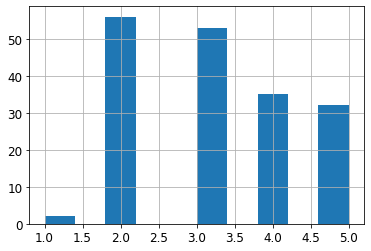

In [25]:
wine["color_cat"].hist()

In [26]:

wine["color_cat"].value_counts()

2.0    56
3.0    53
4.0    35
5.0    32
1.0     2
Name: color_cat, dtype: int64

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine, wine["color_cat"]):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

In [28]:
strat_test_set["color_cat"].value_counts() / len(strat_test_set)

3.0    0.305556
2.0    0.305556
4.0    0.194444
5.0    0.194444
Name: color_cat, dtype: float64

In [29]:
wine["color_cat"].value_counts() / len(wine)

2.0    0.314607
3.0    0.297753
4.0    0.196629
5.0    0.179775
1.0    0.011236
Name: color_cat, dtype: float64

In [0]:
def color_cat_proportions(data):
    return data["color_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(wine, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": color_cat_proportions(wine),
    "Stratified": color_cat_proportions(strat_test_set),
    "Random": color_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [31]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.011236,NaN,0.027778,147.222222,NaN
2.0,0.314607,0.305556,0.305556,-2.876984,-2.876984
3.0,0.297753,0.305556,0.250000,-16.037736,2.620545
4.0,0.196629,0.194444,0.194444,-1.111111,-1.111111
5.0,0.179775,0.194444,0.222222,23.611111,8.159722


In [0]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("color_cat", axis=1, inplace=True)

In [0]:

wine = strat_train_set.copy()

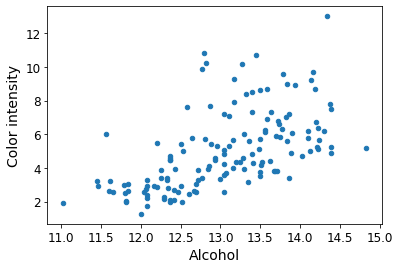

In [34]:
wine.plot(kind="scatter", x="Alcohol", y="Color intensity")
plt.savefig('bad_visualization_plot')

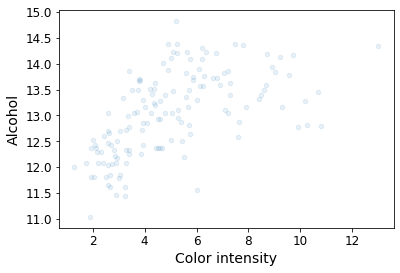

In [35]:
wine.plot(kind="scatter", x="Color intensity", y="Alcohol",alpha=0.1)
plt.savefig("better_visualization_plot")

No handles with labels found to put in legend.


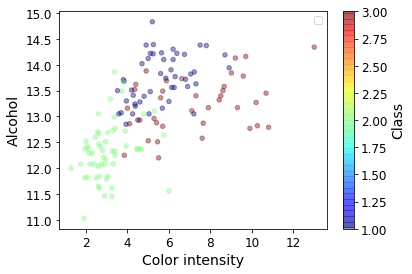

In [36]:
wine.plot(kind="scatter", x="Color intensity", y="Alcohol", alpha=0.4,
    
    c="Class", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig('class__scatterplot')

# question2:Which attribute has the highest correlation with the classification  label?
Alcalinity of ash

In [37]:
corr_matrix = wine.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                           1.000000
Alcalinity of ash               0.523378
Nonflavanoid phenols            0.500277
Malic acid                      0.417848
Color intensity                 0.227464
Ash                            -0.004616
Magnesium                      -0.183316
Alcohol                        -0.289275
Proanthocyanins                -0.498589
Hue                            -0.597168
Proline                        -0.656592
Total phenols                  -0.730227
OD280/OD315 of diluted wines   -0.783316
Flavanoids                     -0.831793
Name: Class, dtype: float64

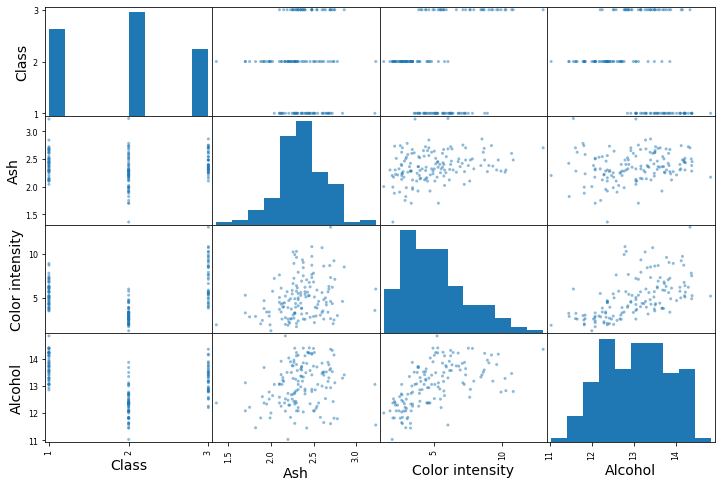

In [38]:

# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Class", "Ash", "Color intensity",
              "Alcohol"]
scatter_matrix(wine[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

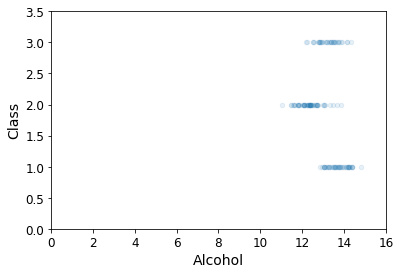

In [39]:

wine.plot(kind="scatter", x="Alcohol", y="Class",
             alpha=0.1)
plt.axis([0, 16, 0, 3.5])
plt.savefig("alcohol_vs_class")

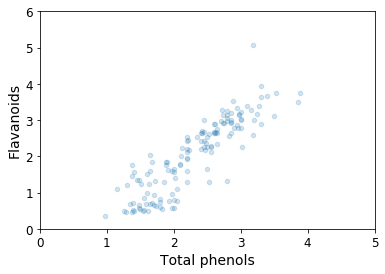

In [40]:
wine.plot(kind="scatter", x="Total phenols", y="Flavanoids",
             alpha=0.2)
plt.axis([0, 5, 0, 6])
plt.show()

# Prepare the data for Machine Learning algorithms

In [0]:
wine = strat_train_set.drop("Class", axis=1) # drop labels for training set
wine_labels = strat_train_set["Class"].copy()

In [129]:
sample_incomplete_rows = wine[wine.isnull().any(axis=1)].head()
sample_incomplete_rows

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [130]:

sample_incomplete_rows.dropna(subset=["Alcohol"])    # option 1

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [131]:
median = wine["Alcohol"].median()
sample_incomplete_rows["Alcohol"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [0]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

drop column Magnesium. 

In [0]:

wine_num = wine.drop('Magnesium', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [48]:
imputer.fit(wine_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [49]:
imputer.statistics_

array([1.305e+01, 1.845e+00, 2.350e+00, 1.900e+01, 2.375e+00, 2.200e+00,
       3.200e-01, 1.555e+00, 4.600e+00, 9.600e-01, 2.825e+00, 6.660e+02])

In [50]:
wine_num.median().values

array([1.305e+01, 1.845e+00, 2.350e+00, 1.900e+01, 2.375e+00, 2.200e+00,
       3.200e-01, 1.555e+00, 4.600e+00, 9.600e-01, 2.825e+00, 6.660e+02])

In [0]:
X = imputer.transform(wine_num)

In [0]:
wine_tr = pd.DataFrame(X, columns=wine_num.columns,
                          index=wine.index)

In [53]:

wine_tr.loc[sample_incomplete_rows.index.values]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [54]:
imputer.strategy

'median'

In [55]:
wine_tr = pd.DataFrame(X, columns=wine_num.columns,
                          index=wine_num.index)
wine_tr.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
155,13.17,5.19,2.32,22.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
92,12.69,1.53,2.26,20.7,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
52,13.82,1.75,2.42,14.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
1,13.20,1.78,2.14,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
84,11.84,0.89,2.58,18.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0


In [56]:
wine_cat = wine[['Alcohol']]
wine_cat.head(10)

,Alcohol
155,13.17
92,12.69
52,13.82
1,13.20
84,11.84
118,12.77
134,12.51
170,12.20
101,12.60
36,13.28


In [0]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [58]:
ordinal_encoder = OrdinalEncoder()
wine_cat_encoded = ordinal_encoder.fit_transform(wine_cat)
wine_cat_encoded[:10]

array([[51.],
       [33.],
       [83.],
       [52.],
       [10.],
       [36.],
       [26.],
       [16.],
       [30.],
       [55.]])

In [59]:
ordinal_encoder.categories_

[array([11.03, 11.45, 11.46, 11.56, 11.61, 11.62, 11.65, 11.79, 11.81,
        11.82, 11.84, 12.  , 12.04, 12.07, 12.08, 12.17, 12.2 , 12.21,
        12.25, 12.29, 12.33, 12.34, 12.37, 12.42, 12.43, 12.47, 12.51,
        12.52, 12.53, 12.58, 12.6 , 12.64, 12.67, 12.69, 12.7 , 12.72,
        12.77, 12.79, 12.81, 12.82, 12.85, 12.86, 12.87, 12.88, 12.93,
        12.96, 12.99, 13.05, 13.07, 13.11, 13.16, 13.17, 13.2 , 13.24,
        13.27, 13.28, 13.29, 13.3 , 13.32, 13.34, 13.36, 13.39, 13.4 ,
        13.41, 13.45, 13.48, 13.49, 13.5 , 13.51, 13.52, 13.56, 13.58,
        13.62, 13.63, 13.67, 13.68, 13.69, 13.71, 13.72, 13.73, 13.74,
        13.77, 13.78, 13.82, 13.83, 13.84, 13.86, 13.88, 13.9 , 13.94,
        14.02, 14.1 , 14.12, 14.13, 14.16, 14.19, 14.2 , 14.21, 14.22,
        14.23, 14.3 , 14.34, 14.37, 14.38, 14.39, 14.83])]

In [60]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
wine_cat_1hot = cat_encoder.fit_transform(wine_cat)
wine_cat_1hot

<142x106 sparse matrix of type '<class 'numpy.float64'>'
	with 142 stored elements in Compressed Sparse Row format>

In [61]:
wine_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
cat_encoder = OneHotEncoder(sparse=False)
wine_cat_1hot = cat_encoder.fit_transform(wine_cat)
wine_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
cat_encoder.categories_

[array([11.03, 11.45, 11.46, 11.56, 11.61, 11.62, 11.65, 11.79, 11.81,
        11.82, 11.84, 12.  , 12.04, 12.07, 12.08, 12.17, 12.2 , 12.21,
        12.25, 12.29, 12.33, 12.34, 12.37, 12.42, 12.43, 12.47, 12.51,
        12.52, 12.53, 12.58, 12.6 , 12.64, 12.67, 12.69, 12.7 , 12.72,
        12.77, 12.79, 12.81, 12.82, 12.85, 12.86, 12.87, 12.88, 12.93,
        12.96, 12.99, 13.05, 13.07, 13.11, 13.16, 13.17, 13.2 , 13.24,
        13.27, 13.28, 13.29, 13.3 , 13.32, 13.34, 13.36, 13.39, 13.4 ,
        13.41, 13.45, 13.48, 13.49, 13.5 , 13.51, 13.52, 13.56, 13.58,
        13.62, 13.63, 13.67, 13.68, 13.69, 13.71, 13.72, 13.73, 13.74,
        13.77, 13.78, 13.82, 13.83, 13.84, 13.86, 13.88, 13.9 , 13.94,
        14.02, 14.1 , 14.12, 14.13, 14.16, 14.19, 14.2 , 14.21, 14.22,
        14.23, 14.3 , 14.34, 14.37, 14.38, 14.39, 14.83])]

In [64]:
wine.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
phenols_ix, Flavanoids_ix, wines_ix, Proanthocyanins_ix = [
    list(wine.columns).index(col)
    for col in ("Total phenols", "Flavanoids", "OD280/OD315 of diluted wines", "Proanthocyanins")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_Flavanoids_per_phenols = True): # no *args or **kwargs
        self.add_Flavanoids_per_phenols = add_Flavanoids_per_phenols
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        Flavanoids_per_wines = X[:, Flavanoids_ix] / X[:, wines_ix]
        Flavanoids_per_Proanthocyanins = X[:, Flavanoids_ix] / X[:, Proanthocyanins_ix]
        if self.add_Flavanoids_per_phenols:
            Flavanoids_per_phenols = X[:,Flavanoids_ix] / X[:,phenols_ix]
            return np.c_[X, Flavanoids_per_wines, Flavanoids_per_Proanthocyanins,
                         Flavanoids_per_phenols]
        else:
            return np.c_[X, Flavanoids_per_wines, Flavanoids_per_Proanthocyanins]

attr_adder = CombinedAttributesAdder(add_Flavanoids_per_phenols=False)
wine_extra_attribs = attr_adder.transform(wine.values)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

wine_num_tr = num_pipeline.fit_transform(wine_num)

In [81]:
wine_num_tr

array([[ 0.16711676,  2.54325847, -0.13709015, ...,  0.76572516,
        -0.19601625,  2.31881037],
       [-0.43684285, -0.7321282 , -0.35664053, ...,  1.735653  ,
         1.87753524,  0.3666473 ],
       [ 0.98497873, -0.53524704,  0.22882716, ..., -0.91514873,
        -0.78027261, -0.69901568],
       ...,
       [ 1.3372885 , -0.16833214, -0.21027361, ..., -1.27692059,
        -0.91115291, -0.76498802],
       [ 1.03530869, -0.89321279, -0.3200488 , ..., -1.08656595,
        -1.05416357, -0.75276137],
       [ 0.2551942 ,  1.46041206, -0.24686534, ..., -0.32298016,
        -0.26615785, -0.57555451]])

In [0]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [0]:
num_attribs = list(wine_num)
#cat_attribs = ["Alcohol"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
       # ("cat", OneHotEncoder(), cat_attribs),
    ])

wine_prepared = full_pipeline.fit_transform(wine)

In [135]:
wine_prepared

array([[ 0.16711676,  2.54325847, -0.13709015, ...,  0.76572516,
        -0.19601625,  2.31881037],
       [-0.43684285, -0.7321282 , -0.35664053, ...,  1.735653  ,
         1.87753524,  0.3666473 ],
       [ 0.98497873, -0.53524704,  0.22882716, ..., -0.91514873,
        -0.78027261, -0.69901568],
       ...,
       [ 1.3372885 , -0.16833214, -0.21027361, ..., -1.27692059,
        -0.91115291, -0.76498802],
       [ 1.03530869, -0.89321279, -0.3200488 , ..., -1.08656595,
        -1.05416357, -0.75276137],
       [ 0.2551942 ,  1.46041206, -0.24686534, ..., -0.32298016,
        -0.26615785, -0.57555451]])

In [136]:
wine_prepared.shape

(142, 15)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
#cat_attribs = ["Alcohol"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [0]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [140]:
old_wine_prepared = old_full_pipeline.fit_transform(wine)
old_wine_prepared

array([[ 0.16711676,  2.54325847, -0.13709015, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43684285, -0.7321282 , -0.35664053, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.98497873, -0.53524704,  0.22882716, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.3372885 , -0.16833214, -0.21027361, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.03530869, -0.89321279, -0.3200488 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2551942 ,  1.46041206, -0.24686534, ...,  0.        ,
         0.        ,  0.        ]])

# Select and train a model

In [142]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
# let's try the full preprocessing pipeline on a few training instances
some_data = wine.iloc[:5]
some_labels = wine_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [3.10269763 2.17651905 0.85108768 0.83946608 1.91959816]


In [144]:

print("Labels:", list(some_labels))

Labels: [3, 2, 1, 1, 2]


In [145]:
some_data_prepared

array([[ 0.16711676,  2.54325847, -0.13709015,  0.74683166, -0.89171257,
        -1.41031611,  2.14193764, -0.08331145,  1.24526795, -1.57536058,
        -1.62414594, -0.08708128,  0.76572516, -0.19601625,  2.31881037],
       [-0.43684285, -0.7321282 , -0.35664053,  0.36525091, -1.46474018,
        -0.58483013,  1.88952673,  0.0360136 , -0.85215687,  0.02951054,
        -0.80825903, -0.81039629,  1.735653  ,  1.87753524,  0.3666473 ],
       [ 0.98497873, -0.53524704,  0.22882716, -1.60135757,  2.51461823,
         1.68276991, -0.29803448,  0.46217448,  0.87767803,  0.25240931,
         0.87978287,  1.37527298, -0.91514873, -0.78027261, -0.69901568],
       [ 0.20486423, -0.50839961, -0.7957413 , -2.4232238 ,  0.55677389,
         0.70809972, -0.80285629, -0.54356521, -0.27698676,  0.43072832,
         1.07672109,  0.93499428, -0.97765541, -0.52379448, -0.6694717 ],
       [-1.50635465, -1.30487342,  0.81429486, -0.42726295, -0.15951062,
         0.16109093, -1.13940417,  1.28040339, 

In [146]:

from sklearn.metrics import mean_squared_error

wine_predictions = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.22821210380475815

In [147]:

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(wine_labels, wine_predictions)
lin_mae

0.18696596878751684

In [148]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_prepared, wine_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [149]:
wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(wine_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_prepared, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [151]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.25819889 0.25819889 0.26726124 0.         0.37796447 0.26726124
 0.         0.53452248 0.26726124 0.26726124]
Mean: 0.24979297039780954
Standard deviation: 0.14955058241860442


In [152]:
lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.17892627 0.29874951 0.32748242 0.26130509 0.2661296  0.21426737
 0.27181028 0.24893723 0.26163444 0.26482273]
Mean: 0.2594064942310676
Standard deviation: 0.03878579144058902


In [153]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(wine_prepared, wine_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [154]:
wine_predictions = forest_reg.predict(wine_prepared)
forest_mse = mean_squared_error(wine_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.15058571093575968

In [155]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, wine_prepared, wine_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.15491933 0.14375906 0.22990681 0.27255406 0.30705979 0.19820624
 0.16475089 0.18898224 0.20528726 0.26859422]
Mean: 0.21340199035859936
Standard deviation: 0.05207659227876987


In [156]:
scores = cross_val_score(lin_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.259406
std       0.040884
min       0.178926
25%       0.252029
50%       0.263229
75%       0.270390
max       0.327482
dtype: float64

In [157]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(wine_prepared, wine_labels)
wine_predictions = svm_reg.predict(wine_prepared)
svm_mse = mean_squared_error(wine_labels, wine_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.23043782553447373

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(wine_prepared, wine_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [159]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [160]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [161]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.284184464865965 {'max_features': 2, 'n_estimators': 3}
0.22132048847924057 {'max_features': 2, 'n_estimators': 10}
0.216508721008134 {'max_features': 2, 'n_estimators': 30}
0.23442157674397385 {'max_features': 4, 'n_estimators': 3}
0.207299074778304 {'max_features': 4, 'n_estimators': 10}
0.20929613320326035 {'max_features': 4, 'n_estimators': 30}
0.24847647432359152 {'max_features': 6, 'n_estimators': 3}
0.20461425921448295 {'max_features': 6, 'n_estimators': 10}
0.20418915964700687 {'max_features': 6, 'n_estimators': 30}
0.24318854364742887 {'max_features': 8, 'n_estimators': 3}
0.2144244214456816 {'max_features': 8, 'n_estimators': 10}
0.20413889258490386 {'max_features': 8, 'n_estimators': 30}
0.25830486097663713 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.21195779856939503 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.288295673195698 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2219872183778893 {'bootstrap': False, 'max_features':

In [162]:

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008536,0.001357,0.001550,0.000237,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.061303,-0.076628,-0.107143,-0.099206,-0.059524,-0.080761,0.019406,17,-0.029499,-0.036382,-0.029240,-0.030214,-0.015595,-0.028186,0.006821
1,0.013343,0.001107,0.001317,0.000057,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.032069,-0.080345,-0.047143,-0.046071,-0.039286,-0.048983,0.016586,10,-0.017699,-0.013717,-0.011491,-0.013509,-0.006930,-0.012669,0.003505
2,0.037236,0.002105,0.002435,0.000180,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.026973,-0.075939,-0.046865,-0.044722,-0.039881,-0.046876,0.016089,9,-0.009764,-0.007089,-0.007680,-0.007300,-0.005604,-0.007488,0.001339
3,0.004808,0.000167,0.000845,0.000028,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.026820,-0.057471,-0.015873,-0.079365,-0.095238,-0.054953,0.030146,12,-0.042281,-0.030482,-0.018519,-0.031189,-0.009747,-0.026443,0.011236
4,0.013220,0.000602,0.001343,0.000050,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.028966,-0.044828,-0.032500,-0.058571,-0.050000,-0.042973,0.010973,5,-0.017876,-0.016991,-0.010526,-0.010789,-0.003947,-0.012026,0.005058
5,0.037881,0.001487,0.002517,0.000210,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.029119,-0.043755,-0.039762,-0.049603,-0.056786,-0.043805,0.009318,6,-0.008633,-0.008997,-0.006979,-0.007437,-0.004308,-0.007271,0.001657
6,0.004818,0.000112,0.000826,0.000039,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.038314,-0.095785,-0.047619,-0.043651,-0.083333,-0.061741,0.023241,14,-0.031465,-0.020649,-0.022417,-0.020468,-0.008772,-0.020754,0.007227
7,0.013409,0.000792,0.001299,0.000044,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.029310,-0.059310,-0.048571,-0.035714,-0.036429,-0.041867,0.010717,4,-0.019823,-0.018407,-0.014211,-0.009298,-0.004561,-0.013260,0.005689
8,0.037035,0.000564,0.002360,0.000056,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.030805,-0.042146,-0.052421,-0.042579,-0.040516,-0.041693,0.006870,3,-0.007758,-0.008928,-0.007982,-0.007622,-0.004571,-0.007372,0.001473
9,0.004992,0.000218,0.000887,0.000064,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.095785,-0.068966,-0.035714,-0.043651,-0.051587,-0.059141,0.021378,13,-0.039331,-0.024582,-0.024366,-0.016569,-0.005848,-0.022139,0.010981


In [163]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(wine_prepared, wine_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [164]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2009947968233451 {'max_features': 7, 'n_estimators': 180}
0.21696266253635876 {'max_features': 5, 'n_estimators': 15}
0.2182174547752086 {'max_features': 3, 'n_estimators': 72}
0.2173485081202656 {'max_features': 5, 'n_estimators': 21}
0.20096745045151274 {'max_features': 7, 'n_estimators': 122}
0.21721076056368027 {'max_features': 3, 'n_estimators': 75}
0.21830209508028875 {'max_features': 3, 'n_estimators': 88}
0.2089097903225477 {'max_features': 5, 'n_estimators': 100}
0.2144674799247323 {'max_features': 3, 'n_estimators': 150}
0.35285604594871484 {'max_features': 5, 'n_estimators': 2}


In [165]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01570202, 0.00852195, 0.00592397, 0.01512117, 0.05912605,
       0.23098313, 0.00372489, 0.004419  , 0.06499758, 0.10954986,
       0.13444025, 0.19713707, 0.07287359, 0.00748406, 0.06999539])

In [119]:

extra_attribs = ["Flavanoids_per_wines", "Flavanoids_per_Proanthocyanins","Flavanoids_per_phenols"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.15137228177357356, 'OD280/OD315 of diluted wines'),
 (0.13033418867804927, 'Proline'),
 (0.0854030005013924, 'Flavanoids_per_phenols'),
 (0.08282259490941242, 'Flavanoids'),
 (0.08133561107108576, 'Color intensity'),
 (0.0683135083050063, 'Total phenols'),
 (0.05850048390197206, 'Nonflavanoid phenols'),
 (0.05422261852754924, 'Alcalinity of ash'),
 (0.05342166012665115, 'Hue'),
 (0.04267978383020134, 'Proanthocyanins'),
 (0.03808659192123676, 'Flavanoids_per_wines'),
 (0.032588426218148836, 'Alcohol'),
 (0.028609623698478356, 'Flavanoids_per_Proanthocyanins'),
 (0.020687366946222644, 'Ash'),
 (0.016758772525445838, 'Malic acid'),
 (0.004872499829558422, 13.88),
 (0.0037265133660465046, 13.05),
 (0.0028772235988792183, 12.58),
 (0.002872477563422116, 13.4),
 (0.0027482164258865235, 13.56),
 (0.002667026725352661, 13.11),
 (0.002432863034516015, 12.93),
 (0.0023417241654705954, 12.86),
 (0.0014310575072306563, 12.82),
 (0.0014072831946366278, 12.96),
 (0.00135911587521822, 13.27),
 (

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Class", axis=1)
y_test = strat_test_set["Class"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [167]:
final_rmse

0.22110831935702666

In [168]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.04141237, 0.30993998])

In [169]:

tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.04141237141512941, 0.3099399833379894)

In [170]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.057835363089786054, 0.30729928173370397)

# Extra material
A full pipeline with both preparation and prediction

In [172]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(wine, wine_labels)
full_pipeline_with_predictor.predict(some_data)

array([3.10269763, 2.17651905, 0.85108768, 0.83946608, 1.91959816])

# Model persistence using joblib

In [0]:
my_model = full_pipeline_with_predictor

In [174]:

from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Example SciPy distributions for RandomizedSearchCV

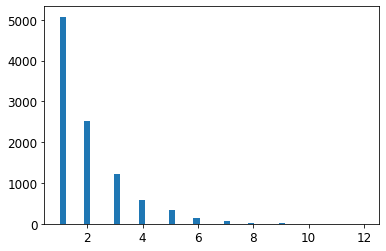

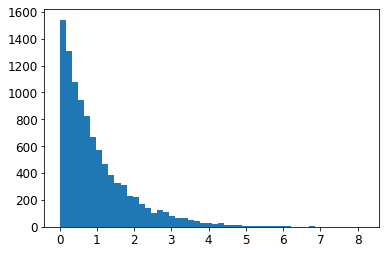

In [175]:

from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()